Importamos librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Cargamos el dataset.

In [2]:
df = pd.read_csv('adult.csv',skiprows=1,names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation', 'relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country','income'])
print(df.shape)
print(df.isna().sum())

(32561, 15)
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Hacemos revision de datos faltantes

In [3]:
df = df.applymap(lambda x : np.nan if x == "?" else x).dropna() #Decidimos deshacernos de ellos ya que solo se componen por aproximadamente 2000 registros.
df.shape

(30162, 15)

Revisamos columnas

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
#print(df.age.unique()) #No es necesario convertir

#print(df.workclass.unique()) 
#'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc','Local-gov' 'Without-pay'

#df.education.unique() 
#'HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate','Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc','1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'

#df.sort_values("education.num") 
#De 1 - preschool a 16 - Doctorate

#df["marital_status"].unique() #7 val
#'Widowed', 'Divorced', 'Separated', 'Never-married','Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'

#df.occupation.unique() # 14 val
#'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty','Other-service', 'Adm-clerical', 'Transport-moving', 'Sales','Craft-repair', 'Farming-fishing', 'Tech-support','Protective-serv', 'Handlers-cleaners', 'Armed-Forces','Priv-house-serv'

#df.relationship.unique()
#'Not-in-family', 'Unmarried', 'Own-child', 'Other-relative','Husband', 'Wife'

#print(df.race.unique()) # 5 val
#'White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'

#df.sex.unique() # 2 val

#print(df['capital_loss']) #No es necesario convertir

#df.fnlwgt.unique().shape

#sns.distplot(df.fnlwgt)


#df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


Hacemos cambios en los datos.

In [16]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})

df["marital_status_num"] = df["marital_status"].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3,'Married-civ-spouse':4, 'Married-spouse-absent':5, 'Married-AF-spouse':6})

df["occupation_num"] = df["occupation"].map({'Exec-managerial':0, 'Machine-op-inspct':1, 'Prof-specialty':2,'Other-service':3, 'Adm-clerical':4, 'Transport-moving':5, 'Sales':6,'Craft-repair':7, 'Farming-fishing':8, 'Tech-support':9,'Protective-serv':10, 'Handlers-cleaners':11, 'Armed-Forces':12,'Priv-house-serv':13})

df["relationship_num"] = df.relationship.map({'Not-in-family':0, 'Unmarried':1, 'Own-child':2, 'Other-relative':3,'Husband':4, 'Wife':5})

df["race_num"] = df.race.map({'White':0 ,'Black':1, 'Asian-Pac-Islander':2 ,'Other':3, 'Amer-Indian-Eskimo':4})

df["sex_num"] = np.where(df.sex == "Male", 0,1) #dos valores; a una variable dummy 

df["capital_chage"] = df["capital_loss"].apply(lambda x : -x) + df["capital_gain"]

df["american_num"] = np.where(df["native_country"] == "United-States", 1,0) #dos valores para no sobrecomplicar la dummy 0 si es extranjero, 1 si es estadounidense

df["income_num"] = np.where(df.income == '<=50K', 0, 1) #Dos valores; a una variable dummy

numerable = ["age","workclass_num","fnlwgt","education_num","marital_status_num","occupation_num","relationship_num","race_num","sex_num","capital_loss","capital_gain",'hours_per_week',"american_num","income_num"]

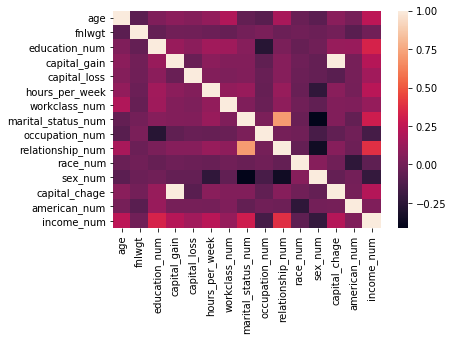

In [17]:
sns.heatmap(df.corr());
#df.corr()["feature"].apply(abs).sort_values(ascending=False)

In [18]:
adult_tidy = df[numerable]
print(df.columns)
adult_tidy

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'workclass_num', 'marital_status_num', 'occupation_num',
       'relationship_num', 'race_num', 'sex_num', 'capital_chage',
       'american_num', 'income_num'],
      dtype='object')


,age,workclass_num,fnlwgt,education_num,marital_status_num,occupation_num,relationship_num,race_num,sex_num,capital_loss,capital_gain,hours_per_week,american_num,income_num
1,82,0,132870,9,0,0,0,0,1,4356,0,18,1,0
3,54,0,140359,4,1,1,1,0,1,3900,0,40,1,0
4,41,0,264663,10,2,2,2,0,1,3900,0,40,1,0
5,34,0,216864,9,1,3,1,0,1,3770,0,45,1,0
6,38,0,150601,6,2,4,1,0,0,3770,0,40,1,0
7,74,1,88638,16,3,2,3,0,1,3683,0,20,1,1
8,68,2,422013,9,1,2,0,0,1,3683,0,40,1,0
10,45,0,172274,16,1,2,1,1,1,3004,0,35,1,1
11,38,3,164526,15,3,2,0,0,0,2824,0,45,1,1
12,52,0,129177,13,0,3,0,0,1,2824,0,20,1,1
